![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.
3. First look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the _PE8_ (snake case).
5. Change effective to date column to datetime format.
6. Check `NaN` values per column.
7. Define a function that differentiates between continuous and discrete variables. **Hint**: A number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. **Hint**: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
9. Get categorical features.
10. What should we do with the `customer_id` column?


In [1]:
#header standarization
def header_data_std(dataframe): 
    cols = []
    for i in range (len(dataframe.columns)):
        cols.append(dataframe.columns[i].lower().replace(" ","_"))
    dataframe.columns = cols
    return(dataframe)

#null values info
def null_find(dataframe):
    null_df = pd.DataFrame(round(dataframe.isna().sum()/len(dataframe),4)*100)
    null_df = null_df.reset_index()
    null_df.columns = ['header','percentage_nulls']
    return(null_df)
           
#check datatypes
def check_dtypes(dataframe):
    test =dataframe.dtypes
    x=0
    for i in range (len(dataframe.columns)):
        print("COL NAME: ",dataframe.columns[i])
        print("  TYPE: ",test[x])
        print("  % OF UNIQUE VALUES: ", (len(pd.unique(dataframe[dataframe.columns[i]]))/len(dataframe[dataframe.columns[i]]))*100 )
        print("  Values: ",pd.unique(dataframe[dataframe.columns[i]]))
        print("  SAMPLE: ",dataframe.iloc[0][dataframe.columns[i]])
        print()
        x+=1
    return()

1. Import the necessary libraries.


In [2]:
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.


In [3]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 

3. First look at its main features (`head`, `shape`, `info`).


In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the _PE8_ (snake case).

In [6]:
customer_df = header_data_std(customer_df)

In [7]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


5. Change effective to date column to datetime format.


In [8]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

6. Check `NaN` values per column.


In [9]:
null_find(customer_df)

,header,percentage_nulls
0,customer,0.0
1,state,0.0
2,customer_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective_to_date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


7. Define a function that differentiates between continuous and discrete variables. **Hint**: A number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.

In [10]:
#split data in continous and discrete + categorical and drop categoricals with excesive values
def split_data(dataframe):
    time = dataframe.select_dtypes(include = np.datetime64)
    numerical = dataframe.select_dtypes(include = np.number)
    categorical = dataframe.select_dtypes(include = object)
    categorical2= pd.DataFrame() 
    numerical2 = pd.DataFrame()

    for i in range (len(numerical.columns)):
        if (len(pd.unique(numerical[numerical.columns[i]]))/len(numerical)*100) < 1 :
            categorical.loc[:,numerical.columns[i]]= numerical[numerical.columns[i]].astype(object)
            #numerical = numerical.drop(numerical.columns[i], axis=1)
        else:
            numerical2.loc[:,numerical.columns[i]] = numerical[numerical.columns[i]]
    #for i in range (len(categorical.columns)):
    #    if (len(pd.unique(categorical[categorical.columns[i]]))/len(categorical)*100) < 1 :
    #        categorical2.loc[:,categorical.columns[i]]= categorical[categorical.columns[i]]
    print(time)
    print(categorical.columns)
    print(numerical2.columns)
    return(pd.concat([categorical,time], axis =1),numerical2)

In [11]:
discrete,continuous = split_data(customer_df)

     effective_to_date
0           2011-02-24
1           2011-01-31
2           2011-02-19
3           2011-01-20
4           2011-02-03
...                ...
9129        2011-02-10
9130        2011-02-12
9131        2011-02-06
9132        2011-02-03
9133        2011-02-14

[9134 rows x 1 columns]
Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies'],
      dtype='object')
Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_policy_inception', 'total_claim_amount'],
      dtype='object')


C:\Users\Kyre\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


8.For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [12]:
discrete.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,number_of_open_complaints,number_of_policies,effective_to_date
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,0,1,2011-02-24
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,0,8,2011-01-31
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,0,2,2011-02-19
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,0,7,2011-01-20
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,0,1,2011-02-03


In [13]:
discrete['renew_offer_type'].unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [14]:
discrete.dtypes

customer                             object
state                                object
response                             object
coverage                             object
education                            object
employmentstatus                     object
gender                               object
location_code                        object
marital_status                       object
policy_type                          object
policy                               object
renew_offer_type                     object
sales_channel                        object
vehicle_class                        object
vehicle_size                         object
months_since_last_claim              object
number_of_open_complaints            object
number_of_policies                   object
effective_to_date            datetime64[ns]
dtype: object

#I´m not doing anything with the categoricals

9.Get categorical features.

discrete = pd.get_dummies(discrete, drop_first=True)
discrete

10.What should we do with the customer_id column?
Already dropped in step 7

In [15]:
discrete = discrete.drop('customer', axis=1)

In [16]:
continuous

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [17]:
data =pd.concat([discrete,continuous], axis =1)

# Lab | Feature extraction

In [18]:
data.shape

(9134, 23)


   1. Open the categoricals variable we created before.


In [19]:
categoricals = data.select_dtypes(object)
categoricals.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,months_since_last_claim,number_of_open_complaints,number_of_policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,32,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,13,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,18,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,18,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,12,0,1


2.Plot all the categorical variables with the proper plot. What can you see?

In [20]:
check_dtypes(categoricals)

COL NAME:  state
  TYPE:  object
  % OF UNIQUE VALUES:  0.054740529888329316
  Values:  ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
  SAMPLE:  Washington

COL NAME:  response
  TYPE:  object
  % OF UNIQUE VALUES:  0.02189621195533173
  Values:  ['No' 'Yes']
  SAMPLE:  No

COL NAME:  coverage
  TYPE:  object
  % OF UNIQUE VALUES:  0.032844317932997594
  Values:  ['Basic' 'Extended' 'Premium']
  SAMPLE:  Basic

COL NAME:  education
  TYPE:  object
  % OF UNIQUE VALUES:  0.054740529888329316
  Values:  ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
  SAMPLE:  Bachelor

COL NAME:  employmentstatus
  TYPE:  object
  % OF UNIQUE VALUES:  0.054740529888329316
  Values:  ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
  SAMPLE:  Employed

COL NAME:  gender
  TYPE:  object
  % OF UNIQUE VALUES:  0.02189621195533173
  Values:  ['F' 'M']
  SAMPLE:  F

COL NAME:  location_code
  TYPE:  object
  % OF UNIQUE VALUES:  0.032844317932997594
  Values:  ['Subur

()

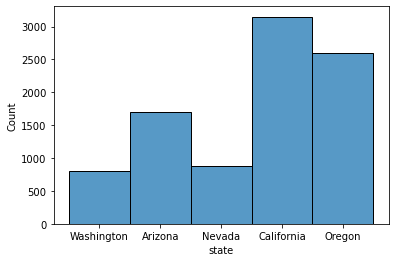

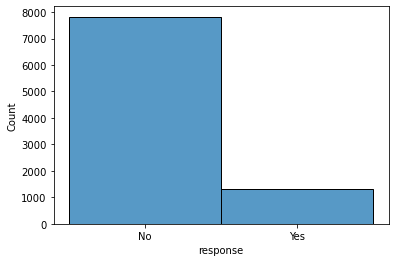

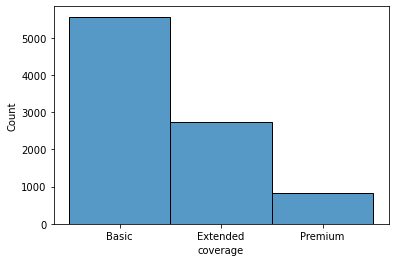

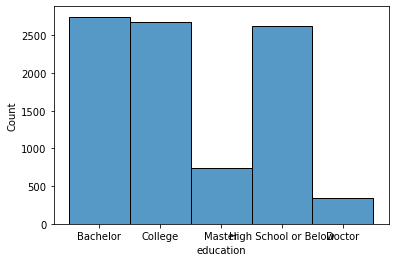

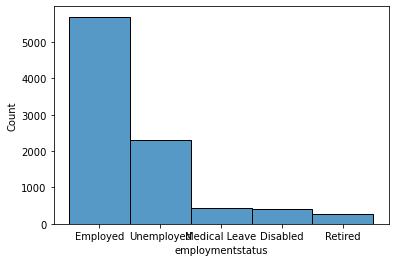

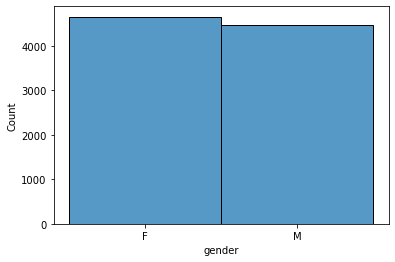

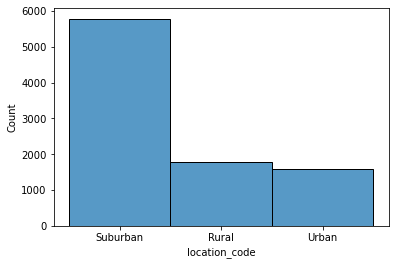

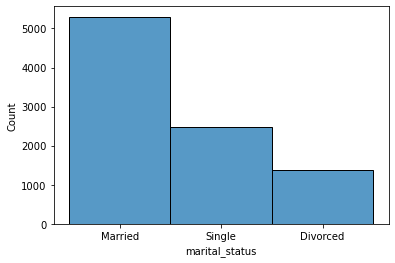

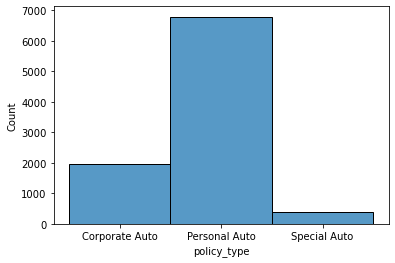

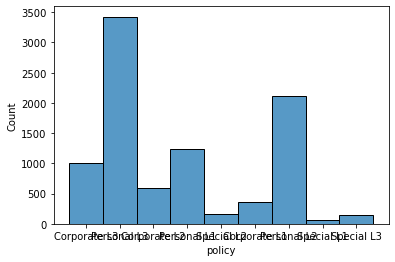

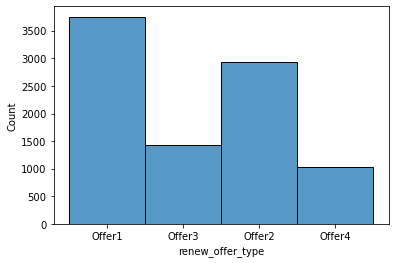

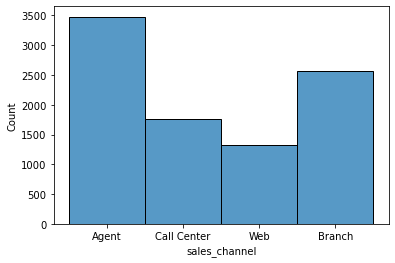

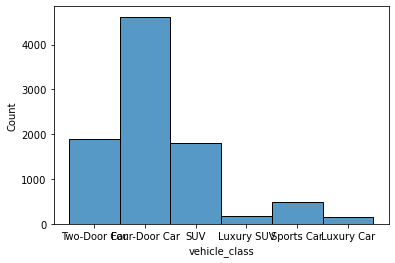

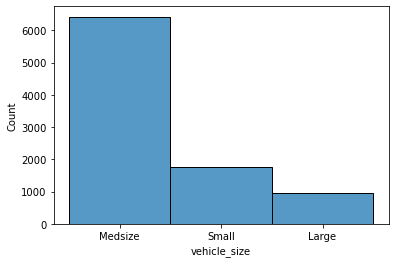

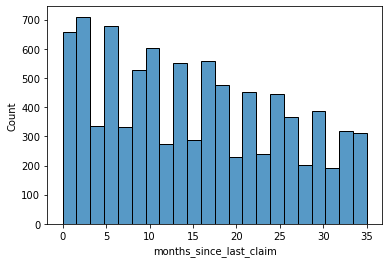

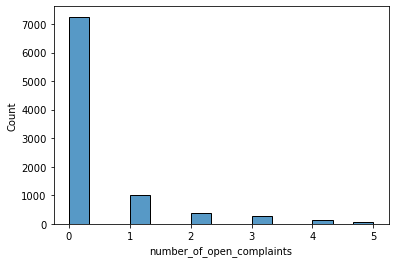

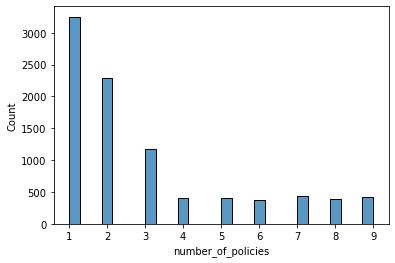

<Figure size 432x288 with 0 Axes>

In [21]:

for i in categoricals.columns:
    sns.histplot(categoricals[i])
    plt.figure(i)

# cleaning_wrangling

customer_df = pd.read_csv('new.csv',index_col=0) 


We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.



In [22]:
def outl_cleaning(DataFrame):
    numerical = DataFrame.select_dtypes(include = np.number)
    categorical = DataFrame.select_dtypes(object)
    time = DataFrame.select_dtypes(include = np.datetime64)

    for x in numerical.columns:
        q75,q25 = np.percentile(numerical.loc[:,x],[75,25])
        intr_qr = q75-q25
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
        numerical.loc[numerical[x] < min,x] = np.nan
        numerical.loc[numerical[x] > max,x] = np.nan
    return(pd.concat([categorical,numerical,time], axis =1))

In [23]:
data = outl_cleaning(data)

C:\Users\Kyre\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [24]:
data

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,...,vehicle_size,months_since_last_claim,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,effective_to_date
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,...,Medsize,32,0,1,2763.519279,56274.0,69.0,5.0,384.811147,2011-02-24
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,...,Medsize,13,0,8,6979.535903,0.0,94.0,42.0,NaN,2011-01-31
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,...,Medsize,18,0,2,12887.431650,48767.0,108.0,38.0,566.472247,2011-02-19
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,...,Medsize,18,0,7,7645.861827,0.0,106.0,65.0,529.881344,2011-01-20
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,...,Medsize,12,0,1,2813.692575,43836.0,73.0,44.0,138.130879,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,...,Medsize,18,0,2,NaN,71941.0,73.0,89.0,198.234764,2011-02-10
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,...,Medsize,14,0,1,3096.511217,21604.0,79.0,28.0,379.200000,2011-02-12
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,...,Medsize,9,3,2,8163.890428,0.0,85.0,37.0,790.784983,2011-02-06
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,...,Large,34,0,3,7524.442436,21941.0,96.0,3.0,691.200000,2011-02-03


In [25]:
data.isnull().sum()

state                              0
response                           0
coverage                           0
education                          0
employmentstatus                   0
gender                             0
location_code                      0
marital_status                     0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
vehicle_class                      0
vehicle_size                       0
months_since_last_claim            0
number_of_open_complaints          0
number_of_policies                 0
customer_lifetime_value          817
income                             0
monthly_premium_auto             430
months_since_policy_inception      0
total_claim_amount               453
effective_to_date                  0
dtype: int64

In [26]:
def fix_nan(DataFrame):
    numerical = DataFrame.select_dtypes(include = np.number)
    categorical = DataFrame.select_dtypes(object)
    time = DataFrame.select_dtypes(include = np.datetime64)

    numerical = numerical.fillna(numerical.median())
    return(pd.concat([categorical,numerical,time], axis =1))

In [27]:
data = fix_nan(data)

In [28]:
data.isnull().sum()

state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
months_since_last_claim          0
number_of_open_complaints        0
number_of_policies               0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
total_claim_amount               0
effective_to_date                0
dtype: int64

Create a copy of the dataframe for the data wrangling.

In [29]:
data_copy = data.copy()

In [30]:
data_copy.isnull().sum()

state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
months_since_last_claim          0
number_of_open_complaints        0
number_of_policies               0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
total_claim_amount               0
effective_to_date                0
dtype: int64

Normalize the continuous variables. You can use any one method you want.

In [31]:
from sklearn.preprocessing import MinMaxScaler


In [32]:
def normalizer (DataFrame):
    numerical = DataFrame.select_dtypes(include = np.number)
    categorical = DataFrame.select_dtypes(object)
    time = DataFrame.select_dtypes(include = np.datetime64)

    #Normalize (numerical).
    transformer = MinMaxScaler().fit(numerical) ### THIS IS THE ONE FOR NORMALIZING
    x_minmax = transformer.transform(numerical)
    numerical = pd.DataFrame(x_minmax, index=numerical.index, columns=numerical.columns)
    
    return(pd.concat([categorical,numerical,time], axis =1))

In [33]:
data_copy= normalizer(data_copy)

In [34]:
data_copy.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
       'months_since_last_claim', 'number_of_open_complaints',
       'number_of_policies', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_policy_inception',
       'total_claim_amount', 'effective_to_date'],
      dtype='object')

Encode the categorical variables

In [35]:
data_copy['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
def encode_cat(DataFrame):
    numerical = DataFrame.select_dtypes(include = np.number)
    categorical = DataFrame.select_dtypes(object)

    
    time = DataFrame.select_dtypes(include = np.datetime64)
    tempCov = categorical["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2}).astype(np.uint8)
    tempHot= categorical[['number_of_policies','number_of_open_complaints','gender','education','response','state','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class']].copy()
    tempHot= pd.get_dummies(tempHot, drop_first=True)

    tempOrd= categorical[['months_since_last_claim','employmentstatus','location_code','vehicle_size']].copy()
    encoder = OrdinalEncoder(dtype = np.uint8)
    tempOrd = pd.DataFrame(encoder.fit_transform(tempOrd), index=tempOrd.index, columns=tempOrd.columns)

    categorical = pd.concat([tempCov,tempOrd,tempHot], axis =1)
    return(pd.concat([categorical,numerical,time], axis =1))    

In [38]:
data_copy = encode_cat(data_copy)

In [39]:
data_copy.dtypes

coverage                                   uint8
months_since_last_claim                    uint8
employmentstatus                           uint8
location_code                              uint8
vehicle_size                               uint8
number_of_policies_2                       uint8
number_of_policies_3                       uint8
number_of_policies_4                       uint8
number_of_policies_5                       uint8
number_of_policies_6                       uint8
number_of_policies_7                       uint8
number_of_policies_8                       uint8
number_of_policies_9                       uint8
number_of_open_complaints_1                uint8
number_of_open_complaints_2                uint8
number_of_open_complaints_3                uint8
number_of_open_complaints_4                uint8
number_of_open_complaints_5                uint8
gender_M                                   uint8
education_College                          uint8
education_Doctor    

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [40]:
data_copy['day'] = data_copy['effective_to_date'].dt.dayofyear
data_copy = data_copy.drop(['effective_to_date'], axis=1)

In [41]:
data_copy['day']

0       55
1       31
2       50
3       20
4       34
        ..
9129    41
9130    43
9131    37
9132    34
9133    45
Name: day, Length: 9134, dtype: int64

In [42]:
data_copy.dtypes

coverage                            uint8
months_since_last_claim             uint8
employmentstatus                    uint8
location_code                       uint8
vehicle_size                        uint8
number_of_policies_2                uint8
number_of_policies_3                uint8
number_of_policies_4                uint8
number_of_policies_5                uint8
number_of_policies_6                uint8
number_of_policies_7                uint8
number_of_policies_8                uint8
number_of_policies_9                uint8
number_of_open_complaints_1         uint8
number_of_open_complaints_2         uint8
number_of_open_complaints_3         uint8
number_of_open_complaints_4         uint8
number_of_open_complaints_5         uint8
gender_M                            uint8
education_College                   uint8
education_Doctor                    uint8
education_High School or Below      uint8
education_Master                    uint8
response_Yes                      